In [6]:
import matplotlib.pyplot as plt
import pandas as pd

In [1]:


df = pd.read_csv('updated_dataset.csv')

In [4]:
''' 
# Convert 'game_creation' to datetime
df['game_creation_dt'] = pd.to_datetime(df['game_creation'], unit='ms')

# Convert 'game_duration' from seconds to minutes
df['game_duration_min'] = df['game_duration'] / 60

# Save the updated DataFrame to a new CSV file
df.to_csv('updated_dataset.csv', index=False)
'''

In [2]:
df.head()

,match_id,game_creation,game_duration,game_mode,game_type,game_version,map_id,participant_id,summoner_id,puuid,...,assists,total_damage_dealt,total_damage_taken,gold_earned,vision_score,total_minions_killed,team_position,win,game_creation_dt,game_duration_min
0,NA1_4998871315,1715847289856,1665,CLASSIC,MATCHED_GAME,14.10.584.5961,11,1,2L5Pg_5bWVXlCPgz2Ibnug53iy-hR4da7bwWSPoXXnvQT2...,8gK6HwW-9oNCit7oWMYcfTWNCD0P_y3S_LfALE2JI9BcJc...,...,11,171718,32084,14676,19,201,TOP,True,2024-05-16 08:14:49.856,27.75
1,NA1_4998871315,1715847289856,1665,CLASSIC,MATCHED_GAME,14.10.584.5961,11,2,bFLwzgKVpvm0X3oEx2hC8RJnaHYN6JxwhHed6ZHvlw12hNE6,8WGtLIFEtbGywb_CAx3jCE9l1sm6gvhzUd3_vglHKqVcyi...,...,15,184645,29335,12272,62,29,JUNGLE,True,2024-05-16 08:14:49.856,27.75
2,NA1_4998871315,1715847289856,1665,CLASSIC,MATCHED_GAME,14.10.584.5961,11,3,E3eFh1D7cTJVMOzmFvF7o8XZWx-96a8TOA8obPhS0hL4S4o,zcSkZmvbs1zx9QUsmwhgr9vojju4od6usxtWp9sC7qd9wB...,...,19,101757,14785,10159,29,173,MIDDLE,True,2024-05-16 08:14:49.856,27.75
3,NA1_4998871315,1715847289856,1665,CLASSIC,MATCHED_GAME,14.10.584.5961,11,4,S1Tq4jLLhrJQSBIYlTBc5_K_DscqdQ73iQWbvso3ulvqaOu9,L47zkOYWG2yG95qQxCrfBBuHsP_PT_i7OcvvWBYJzaSIgi...,...,6,141286,13295,13046,16,190,BOTTOM,True,2024-05-16 08:14:49.856,27.75
4,NA1_4998871315,1715847289856,1665,CLASSIC,MATCHED_GAME,14.10.584.5961,11,5,7Le8P-DYzdnvZIuprdubglWBw84XCxLEDx9S-IZTl58Q5S...,ZvkEF0glNexlbqoKbzOgEcuHJFmFfrYnb1OEX67k5H-q-Y...,...,18,26488,13879,8273,30,13,UTILITY,True,2024-05-16 08:14:49.856,27.75


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1332388 entries, 0 to 1332387
Data columns (total 32 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   match_id              1332388 non-null  object 
 1   game_creation         1332388 non-null  int64  
 2   game_duration         1332388 non-null  int64  
 3   game_mode             1332388 non-null  object 
 4   game_type             1332388 non-null  object 
 5   game_version          1332388 non-null  object 
 6   map_id                1332388 non-null  int64  
 7   participant_id        1332388 non-null  int64  
 8   summoner_id           1332388 non-null  object 
 9   puuid                 1332388 non-null  object 
 10  champion_id           1332388 non-null  int64  
 11  spell1_id             0 non-null        float64
 12  spell2_id             0 non-null        float64
 13  item0                 1332388 non-null  int64  
 14  item1                 1332388 non-

In [4]:
print(df.isnull().sum())

match_id                      0
game_creation                 0
game_duration                 0
game_mode                     0
game_type                     0
game_version                  0
map_id                        0
participant_id                0
summoner_id                   0
puuid                         0
champion_id                   0
spell1_id               1332388
spell2_id               1332388
item0                         0
item1                         0
item2                         0
item3                         0
item4                         0
item5                         0
item6                         0
kills                         0
deaths                        0
assists                       0
total_damage_dealt            0
total_damage_taken            0
gold_earned                   0
vision_score                  0
total_minions_killed          0
team_position            305937
win                           0
game_creation_dt              0
game_dur

In [5]:
df['game_mode'].value_counts()

game_mode
CLASSIC       1025690
ARAM           172720
CHERRY         110576
STRAWBERRY      17172
URF              3750
ONEFORALL        1690
NEXUSBLITZ        790
Name: count, dtype: int64

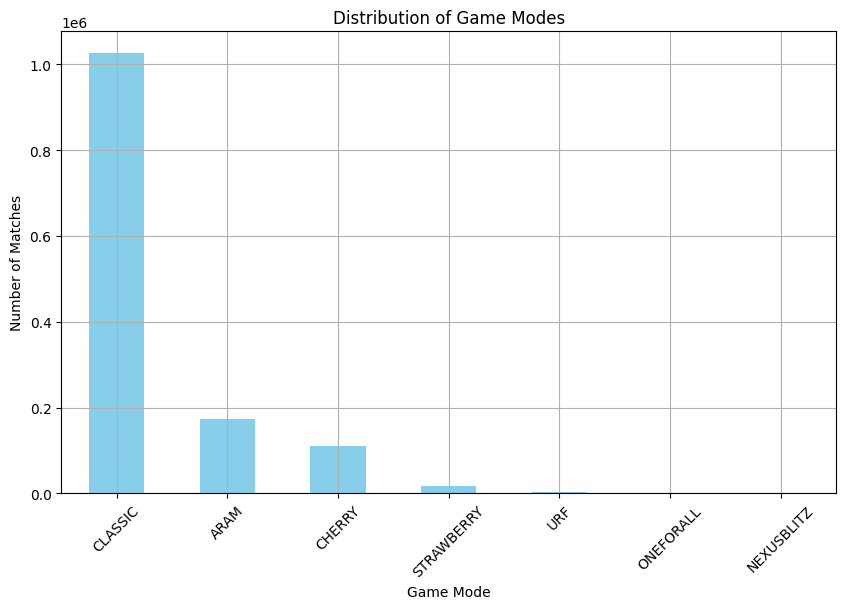

In [7]:
# Calculating the value counts for the 'game_mode' column
game_mode_counts = df['game_mode'].value_counts()

# Creating a bar plot for the game mode counts
plt.figure(figsize=(10, 6))
game_mode_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Game Modes')
plt.xlabel('Game Mode')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [8]:
# Find the min and max dates for Cherry games
cherry_dates = df[df['game_mode'] == 'CHERRY']['game_creation_dt']
start_date = cherry_dates.min()
end_date = cherry_dates.max()

# Filter the DataFrame to include all games between these dates
filtered_df = df[(df['game_creation_dt'] >= start_date) & (df['game_creation_dt'] <= end_date)]

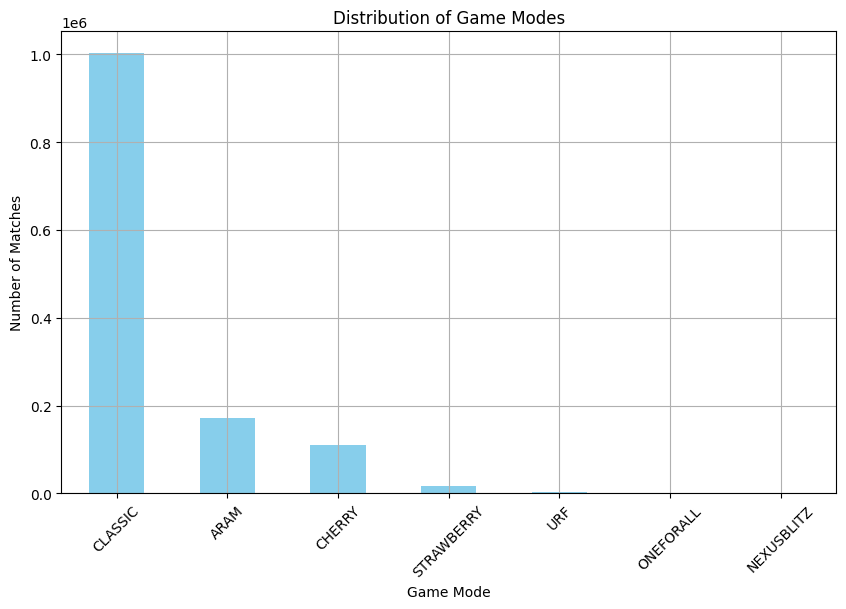

In [9]:
game_mode_counts = filtered_df['game_mode'].value_counts()

# Creating a bar plot for the game mode counts
plt.figure(figsize=(10, 6))
game_mode_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Game Modes')
plt.xlabel('Game Mode')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [10]:
game_mode_counts

game_mode
CLASSIC       1002160
ARAM           170560
CHERRY         110576
STRAWBERRY      17172
URF              3750
ONEFORALL        1690
NEXUSBLITZ        790
Name: count, dtype: int64

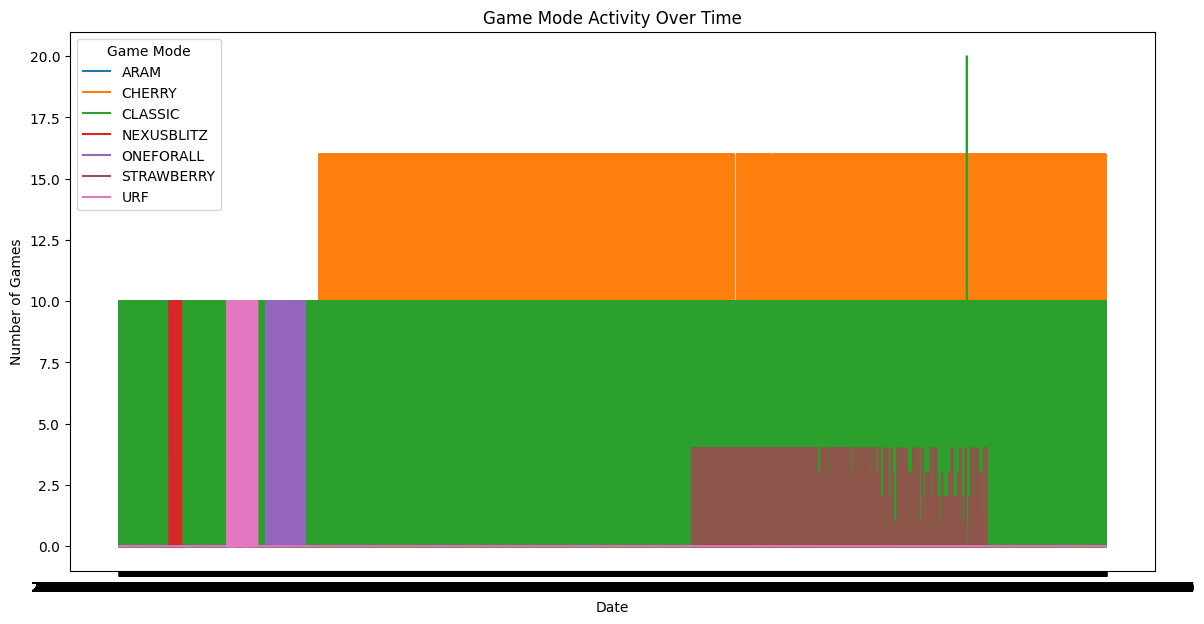

In [11]:
time_series_data = df.groupby(['game_creation_dt', 'game_mode']).size().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(14, 7))
for mode in time_series_data.columns:
    plt.plot(time_series_data.index, time_series_data[mode], label=mode)

plt.title('Game Mode Activity Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Games')
plt.legend(title='Game Mode')
plt.show()